In [1]:
!pip install scikit-posthocs

In [2]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.metrics import mutual_info_score
import scipy.stats as ss
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import chi2_contingency
from itertools import combinations
import gzip
import requests
from io import BytesIO

In [3]:
GITHUB_CLEAN_URL = "https://raw.githubusercontent.com/Yael-Parra/Airbnb-Analysis/feature-eda-cleaning/data/airbnb_cleaned.csv.gz"


def load_airbnb_data_from_github(url):
    """
    Downloading and processing Airbnb data from GitHub repository.
    """
    print("🔗 Downloading data from GitHub...")

    try:
        # Download the compressed CSV file from GitHub
        response = requests.get(url)
        response.raise_for_status()

        print("📊 Processing compressed file..")

        # Decompressing and reading the CSV file
        with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
            df = pd.read_csv(f)

        print(f"✅ Data downloaded succesfully!")

        return df

    except Exception as e:
        print(f"❌ Error while downloading data: {e}")
        return None
# Creating dataframe from GitHub URL
df = load_airbnb_data_from_github(GITHUB_CLEAN_URL)

🔗 Downloading data from GitHub...
📊 Processing compressed file..
✅ Data downloaded succesfully!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id_announcement                 220031 non-null  int64  
 1   title_announcement              219964 non-null  object 
 2   host_id                         220031 non-null  int64  
 3   host_name                       220031 non-null  object 
 4   city                            220031 non-null  object 
 5   neighbourhood_group             220031 non-null  object 
 6   neighbourhood                   220031 non-null  object 
 7   latitude                        220031 non-null  float64
 8   longitude                       220031 non-null  float64
 9   room_type                       220031 non-null  object 
 10  minimum_nights                  220031 non-null  int64  
 11  number_of_reviews               220031 non-null  int64  
 12  reviews_per_mont

## Diccionario de Variables

| Nº  | Variable                        | Descripción                                      |
|-----|---------------------------------|--------------------------------------------------|
| 0   | `id_announcement`               | ID único del anuncio                             |
| 1   | `title_announcement`            | Título del anuncio publicado                     |
| 2   | `host_id`                       | ID del anfitrión                                 |
| 3   | `host_name`                     | Nombre del anfitrión                             |
| 4   | `city`                          | Ciudad donde se encuentra el alojamiento         |
| 5   | `neighbourhood_group`          | Agrupación administrativa o general del barrio   |
| 6   | `neighbourhood`                | Barrio específico del alojamiento                |
| 7   | `latitude`                      | Latitud geográfica del alojamiento               |
| 8   | `longitude`                     | Longitud geográfica del alojamiento              |
| 9   | `room_type`                     | Tipo de habitación (entera, compartida, etc.)    |
| 10  | `minimum_nights`               | Número mínimo de noches de estadía               |
| 11  | `number_of_reviews`            | Número total de reseñas del anuncio              |
| 12  | `reviews_per_month`            | Reseñas promedio por mes                         |
| 13  | `calculated_host_listings_count` | Número de anuncios del mismo anfitrión         |
| 14  | `availability_365`             | Días disponibles al año para reservar            |
| 15  | `price_USD`                    | Precio por noche en dólares estadounidenses (USD)|


In [6]:
print(df.isnull().sum())

id_announcement                    0
title_announcement                67
host_id                            0
host_name                          0
city                               0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
price_USD                          0
dtype: int64


In [16]:
df.describe(include='all')

,id_announcement,title_announcement,host_id,host_name,city,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_USD
count,2.200310e+05,219964,2.200310e+05,220031,220031,220031,220031,220031.000000,220031.000000,220031,220031.000000,220031.000000,220031.000000,220031.000000,220031.000000,220031.000000
unique,NaN,213147,NaN,31496,6,27,562,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Home away from home,NaN,David,London,Unknown,Westminster,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,53,NaN,1418,85068,151518,9588,NaN,NaN,128154,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.240831e+07,NaN,8.494528e+07,NaN,NaN,NaN,NaN,32.573053,16.428135,NaN,5.258023,20.129164,0.944819,13.450046,120.403526,158.612215
std,1.175490e+07,NaN,8.856607e+07,NaN,NaN,NaN,NaN,30.144854,76.030471,NaN,20.118261,43.012277,1.430133,73.206771,131.103156,323.145651
min,2.539000e+03,NaN,1.944000e+03,NaN,NaN,NaN,NaN,-34.135212,-74.244420,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.338370e+07,NaN,1.439602e+07,NaN,NaN,NaN,NaN,40.412620,-3.705870,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,61.890000
50%,2.249789e+07,NaN,4.640392e+07,NaN,NaN,NaN,NaN,40.794240,-0.128380,NaN,2.000000,4.000000,0.320000,1.000000,77.000000,102.000000
75%,3.155445e+07,NaN,1.415097e+08,NaN,NaN,NaN,NaN,51.496200,9.199535,NaN,4.000000,19.000000,1.290000,3.000000,225.000000,172.930000


## Conclusiones Generales del Dataset

A partir del análisis estadístico descriptivo del conjunto de datos, se destacan los siguientes puntos clave:

### 1. **Composición del dataset**
- Contiene **220,031 registros**.
- Hay **31496 anfitriones únicos** (`host_name`), siendo el más frecuente "David" (con 1,418 anuncios).
- El anuncio más repetido se titula **"Home away from home"**, apareciendo **53 veces**.
- Hay alojamientos en **6 ciudades diferentes**.

### 2. **Ubicación geográfica**
- Las coordenadas (`latitude`, `longitude`) abarcan una gran diversidad geográfica, con longitudes desde **-74.24 (América)** hasta **151.33 (Oceanía)**.
- Esto indica presencia global: **probablemente en ciudades como Nueva York, Madrid, Londres, Sídney, Tokio, Milán**, etc.

### 3. **Tipo de alojamiento**
- El tipo más común es **"Entire home/apt"** (hogar completo), que representa más de la mitad de las ofertas (128,154 anuncios).

### 4. **Precio (`price_USD`)**
- **Precio promedio**: ~158.61 USD
- **Mediana (valor típico)**: ~102 USD
- **Máximo**: 17,078 USD por noche
- **Mínimo**: 0 USD (potencialmente valores erróneos o promociones especiales)
- **Gran dispersión**: Desviación estándar de ~323 USD indica **alta variabilidad** en precios.

### 5. **Duración mínima de estadía (`minimum_nights`)**
- La mayoría permite estadías cortas:
  - **Mediana**: 2 noches
  - **Máximo**: 1,250 noches (posiblemente error o alojamiento de larga duración)
  - **75%** de los anuncios permiten estadías de **4 noches o menos**

### 6. **Actividad y disponibilidad**
- **Número de reseñas** por alojamiento:
  - Promedio: 20 reseñas
  - Máximo: 896 reseñas en un solo anuncio
- **Reseñas por mes**: La mayoría tiene entre 0 y 1.3 reseñas al mes.
- **Disponibilidad anual (`availability_365`)**:
  - Promedio: 120 días disponibles al año
  - Máximo: 365 días

### 7. **Cantidad de anuncios por anfitrión**
- El promedio es ~13 anuncios por anfitrión, aunque algunos tienen hasta **999 anuncios**, lo cual puede indicar **gestión profesional de múltiples propiedades**.

---

### 📌 Recomendación
Se sugiere:
- Revisar valores extremos en `price_USD`, `minimum_nights`, y `availability_365` para detectar posibles outliers o errores.
- Considerar transformar o normalizar variables con alta dispersión para análisis estadísticos posteriores.


In [21]:
# valores unicos
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

id_announcement: 220031 valores únicos
title_announcement: 213147 valores únicos
host_id: 144510 valores únicos
host_name: 31496 valores únicos
city: 6 valores únicos
neighbourhood_group: 27 valores únicos
neighbourhood: 562 valores únicos
latitude: 98672 valores únicos
longitude: 108328 valores únicos
room_type: 4 valores únicos
minimum_nights: 164 valores únicos
number_of_reviews: 548 valores únicos
reviews_per_month: 1126 valores únicos
calculated_host_listings_count: 110 valores únicos
availability_365: 369 valores únicos
price_USD: 3177 valores únicos


## Revisión de Valores Únicos por Columna

Se realizó un análisis de los valores únicos en cada columna del dataset para identificar posibles inconsistencias, errores de codificación o columnas que requieren limpieza.

### Resultados destacados

| Columna                        | Valores únicos | Observación                                                   |
|-------------------------------|----------------|----------------------------------------------------------------|
| `id_announcement`             | 220,031        | ID único por anuncio, correcto.                               |
| `title_announcement`          | 213,147        | Títulos variados; revisar posibles duplicados exactos.        |
| `host_id`                     | 144,510        | Muchos anfitriones distintos.                                 |
| `host_name`                   | 31,496         | Posibles duplicados por nombres similares.                    |
| `city`                        | 6              | Columna limpia y categórica.                                  |
| `neighbourhood_group`         | 27             | Requiere revisión por posibles valores como `"Unknown"`.      |
| `neighbourhood`              | 562            | Alta cardinalidad; revisar por duplicados con diferencias leves. |
| `latitude` / `longitude`      | 98,672 / 108,328 | Georreferenciación extensa, como se espera.                  |
| `room_type`                   | 4              | Columna limpia; verificar si hay inconsistencias de formato.  |
| `minimum_nights`              | 164            | Revisar outliers (ej. estadías mínimas de más de 365 días).   |
| `number_of_reviews`           | 548            | Distribución variada, correcta.                               |
| `reviews_per_month`           | 1,126          | OK. Revisión opcional de valores extremos.                    |
| `calculated_host_listings_count` | 110        | OK, indica cantidad de alojamientos por anfitrión.            |
| `availability_365`            | 369            | Revisar si todos los valores están entre 0 y 365.             |
| `price_USD`                   | 3,177          | Alta dispersión; revisar outliers (valores extremadamente bajos o altos). |

### Recomendaciones
- Inspeccionar y tratar posibles **outliers** en `price_USD` y `minimum_nights`.
- Considerar unificar nombres de barrios o anfitriones similares si se usa en análisis agregados.

In [19]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).
# Buscar valores extraños: ver los valores únicos en cada feature.
# Creamos un DataFrame con dos columnas: 'feature' y 'n_values', donde 'n_values' es la lista de valores únicos de cada columna.

features = []
n_values = []

for col in df.columns:
    features.append(col)
    n_values.append(df[col].unique())

valores_unicos_df = pd.DataFrame({'feature': features, 'n_values': n_values})

print(valores_unicos_df)

                           feature  \
0                  id_announcement   
1               title_announcement   
2                          host_id   
3                        host_name   
4                             city   
5              neighbourhood_group   
6                    neighbourhood   
7                         latitude   
8                        longitude   
9                        room_type   
10                  minimum_nights   
11               number_of_reviews   
12               reviews_per_month   
13  calculated_host_listings_count   
14                availability_365   
15                       price_USD   

                                             n_values  
0   [2539, 2595, 3647, 3831, 5022, 5099, 5121, 517...  
1   [Clean & quiet apt home by the park, Skylit Mi...  
2   [2787, 2845, 4632, 4869, 7192, 7322, 7356, 896...  
3   [John, Jennifer, Elisabeth, LisaRoxanne, Laura...  
4    [New York, London, Milan, Tokyo, Sydney, Madrid]  
5   [Brooklyn, Ma

## Revisión Detallada de Valores Únicos por Columna

Se generó un DataFrame que contiene, para cada variable del dataset, la lista de todos los valores únicos encontrados. Esto se utilizó como herramienta de detección de errores, valores atípicos o codificaciones inconsistentes.

### Metodología
Para cada columna:
- Se extrajeron los valores únicos usando `.unique()`
- Se almacenaron en una tabla con dos columnas: `feature` y `n_values`

### Resultados clave

- **`city`**: contiene 6 valores únicos → todos correctos (`New York`, `London`, `Milan`, `Tokyo`, `Sydney`, `Madrid`)
- **`room_type`**: contiene 4 valores → revisar consistencia en mayúsculas, espacios (`"Private room"`, `"private room"`, etc.)
- **`neighbourhood_group`** y **`neighbourhood`**: contienen decenas y cientos de valores únicos → potencial de duplicados semánticos
- **`minimum_nights`**, **`availability_365`**, y **`price_USD`**: tienen distribuciones amplias → revisar posibles valores extremos o errores de carga
- **`reviews_per_month`**: contiene decimales → se puede redondear si se requiere simplificación

-----
-----

# Análisis Variables Categóricas

In [23]:
# Identificar las variables categóricas
category_columns = df.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas: ", category_columns.values)

# Calcular la cardinalidad de cada columna
cardinalities = df[category_columns].nunique()
print('\n',cardinalities.sort_values(ascending=False))


Variables categóricas:  ['title_announcement' 'host_name' 'city' 'neighbourhood_group'
 'neighbourhood' 'room_type']

 title_announcement     213147
host_name               31496
neighbourhood             562
neighbourhood_group        27
city                        6
room_type                   4
dtype: int64


Se identificaron las columnas categóricas del dataset y se calculó su cardinalidad (número de valores únicos). Este análisis permite decidir cómo tratar cada variable en análisis posteriores o en modelos de machine learning.

### Variables Categóricas Identificadas

- `title_announcement`
- `host_name`
- `city`
- `neighbourhood_group`
- `neighbourhood`
- `room_type`

### Cardinalidad de cada variable

| Variable             | Valores únicos | Observación                                           |
|----------------------|----------------|--------------------------------------------------------|
| `title_announcement` | 213,147        | ❌ Muy alta. No recomendable para codificación directa. |
| `host_name`          | 31,496         | ⚠️ Alta. Muchos duplicados posibles; usar con cuidado.  |
| `neighbourhood`      | 562            | ⚠️ Alta. Requiere limpieza o agrupación.                |
| `neighbourhood_group`| 27             | ✅ Apta para análisis categórico.                      |
| `city`               | 6              | ✅ Ideal para codificación directa.                    |
| `room_type`          | 4              | ✅ Perfecta para análisis categórico y visualización.  |

---

### Recomendaciones

- **Evitar usar directamente** `title_announcement` o `host_name` en modelos.
- **Agrupar o reducir** la cardinalidad de `neighbourhood` si se desea usar como variable explicativa.
- **Codificar** `city`, `room_type`, y `neighbourhood_group` con técnicas como `OneHotEncoding` o `LabelEncoding`.

Este análisis permite optimizar tanto la limpieza de datos como la eficiencia de modelos predictivos.


###  Distribuciones y proporciones

#### room_type

In [26]:
df['room_type'].value_counts(normalize=True) * 100

,proportion
room_type,
Entire home/apt,58.243611
Private room,39.318096
Shared room,1.823379
Hotel room,0.614913


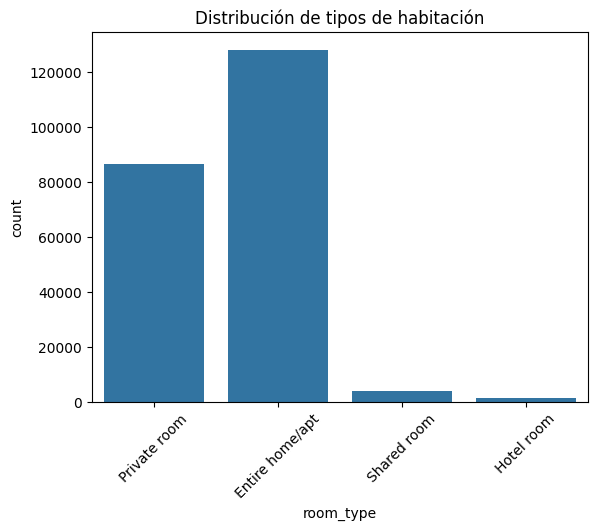

In [27]:
sns.countplot(data=df, x='room_type')
plt.title("Distribución de tipos de habitación")
plt.xticks(rotation=45)
plt.show()

#### City

In [28]:
df['city'].value_counts(normalize=True) * 100

,proportion
city,
London,38.661825
New York,22.221869
Sydney,16.662198
Madrid,8.916016
Milan,8.327008
Tokyo,5.211084


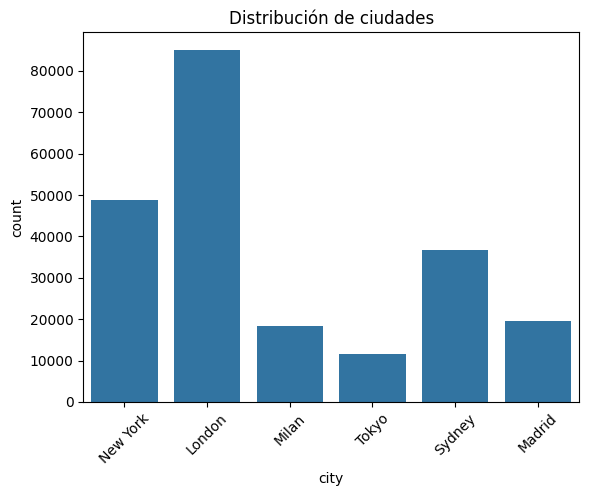

In [29]:
sns.countplot(data=df, x='city')
plt.title("Distribución de ciudades")
plt.xticks(rotation=45)
plt.show()

#### neighbourhood_group

In [30]:
df['neighbourhood_group'].value_counts(normalize=True) * 100

,proportion
neighbourhood_group,
Unknown,68.862115
Manhattan,9.844522
Brooklyn,9.136894
Centro,3.930810
Queens,2.575092
Salamanca,0.601733
Chamberí,0.569011
Arganzuela,0.501747
Bronx,0.495839


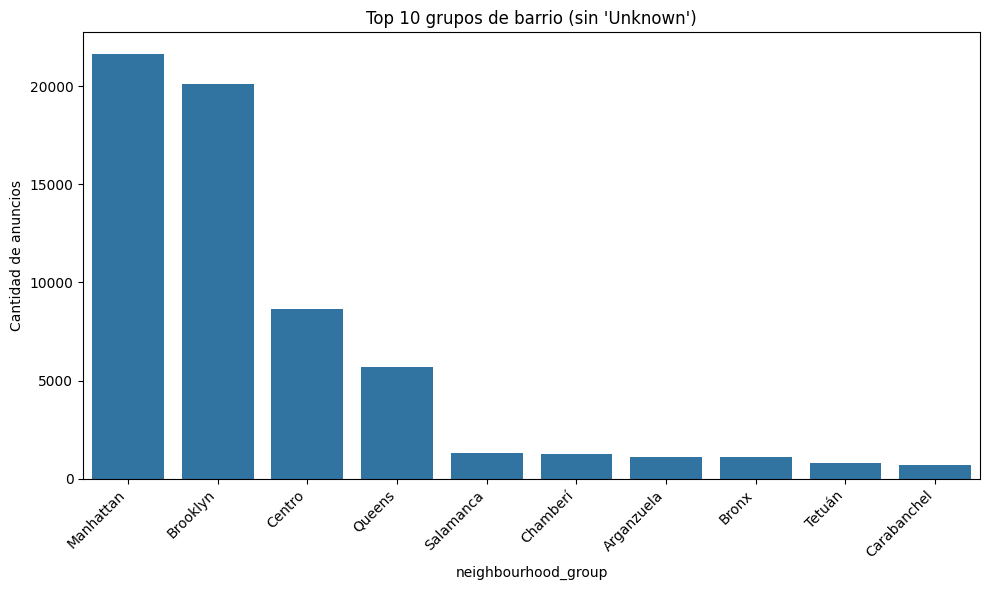

In [44]:
# Elegir solo los top 10 si hay demasiadas categorías
top_n = 10
top_counts = df.head(top_n)

# Gráfico mejorado
plt.figure(figsize=(10, 6))
sns.barplot(x=top_counts.index, y=top_counts.values)
plt.title("Top 10 grupos de barrio (sin 'Unknown')")
plt.ylabel("Cantidad de anuncios")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Comparaciones cruzadas entre categóricas

In [36]:
pd.crosstab(df['city'], df['room_type'], normalize='index') * 100

room_type,Entire home/apt,Hotel room,Private room,Shared room
city,,,,
London,55.773029,1.308365,42.180373,0.738233
Madrid,57.671526,0.846162,39.805281,1.677031
Milan,74.254994,0.403886,23.883855,1.457264
New York,51.966459,0.000000,45.661111,2.372431
Sydney,62.511592,0.000000,35.772735,1.715673
Tokyo,65.088087,0.000000,26.199198,8.712716


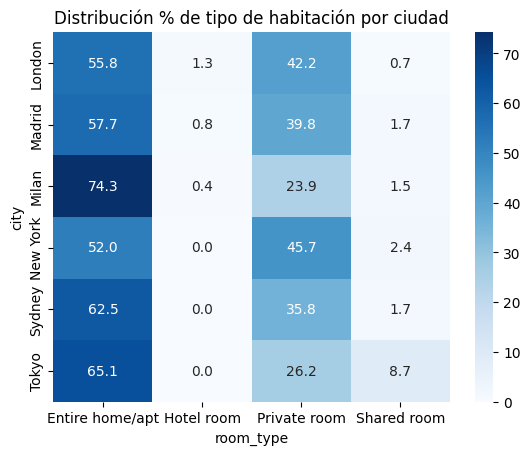

In [37]:
sns.heatmap(pd.crosstab(df['city'], df['room_type'], normalize='index') * 100, annot=True, fmt=".1f", cmap="Blues")
plt.title("Distribución % de tipo de habitación por ciudad")
plt.show()

#### Observaciones Clave

| Ciudad     | Principales Hallazgos |
|------------|------------------------|
| **Milán**  | Alta proporción de alojamientos completos (74.3%). Baja presencia de habitaciones privadas (23.9%). |
| **Nueva York** | Mayor proporción de habitaciones privadas (45.7%). Solo 52% son alojamientos completos. Compartir propiedad es más común. |
| **Tokio**  | Más diversidad. Tiene el mayor porcentaje de habitaciones compartidas (8.7%). |
| **Londres y Madrid** | Distribución equilibrada entre viviendas completas (~56%) y habitaciones privadas (~41%). |
| **Sídney** | Predominio de viviendas completas (62.5%), seguido de habitaciones privadas (35.8%). |


In [38]:
pd.crosstab(df['city'], df['neighbourhood_group'], normalize='index') * 100

neighbourhood_group,Arganzuela,Barajas,Bronx,Brooklyn,Carabanchel,Centro,Chamartín,Chamberí,Ciudad Lineal,Fuencarral - El Pardo,...,Retiro,Salamanca,San Blas - Canillejas,Staten Island,Tetuán,Unknown,Usera,Vicálvaro,Villa de Vallecas,Villaverde
city,,,,,,,,,,,,,,,,,,,,,
London,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.00000,0.000000,0.000000
Madrid,5.627485,0.876746,0.000000,0.000000,3.608931,44.087063,2.956469,6.381894,3.308186,1.605668,...,3.384647,6.748904,2.533388,0.000000,4.159445,0.0,1.427261,0.36701,0.499541,0.902233
Milan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.00000,0.000000,0.000000
New York,0.000000,0.000000,2.231312,41.116679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.762859,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
Sydney,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.00000,0.000000,0.000000
Tokyo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.00000,0.000000,0.000000


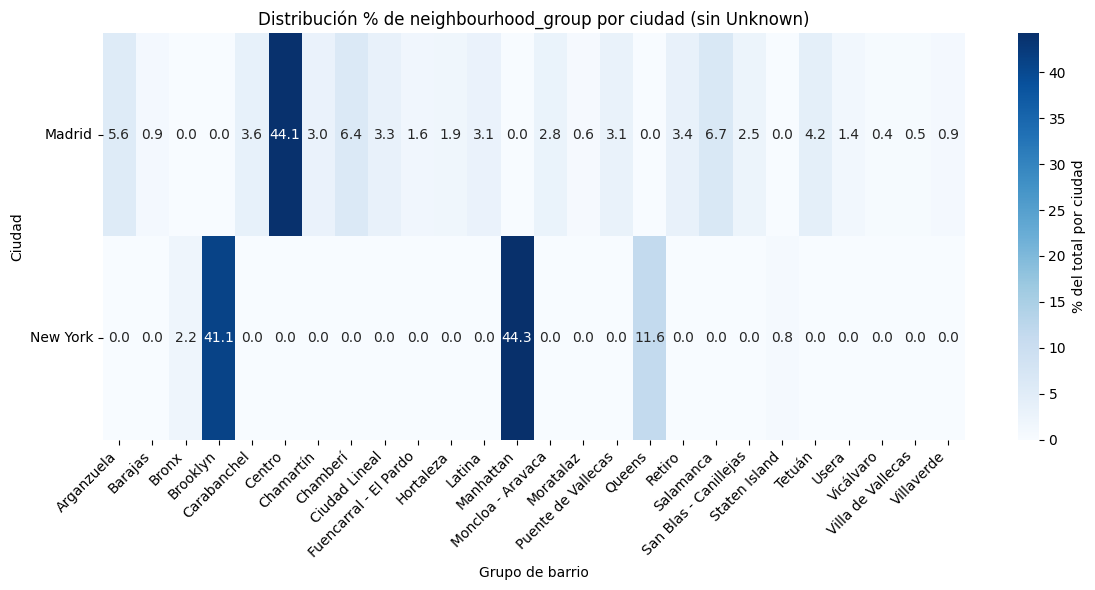

In [43]:
df_filtered = df[df['neighbourhood_group'] != 'Unknown']
# 1. Agrupar y contar
counts = (
    df_filtered
    .groupby(['city', 'neighbourhood_group'])
    .size()
    .reset_index(name='count')
)

# 2. Pivot
pivot = counts.pivot(index='city', columns='neighbourhood_group', values='count').fillna(0)

# 3. Normalizar por ciudad (fila)
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# 4. Gráfico
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_pct,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    cbar_kws={'label': '% del total por ciudad'}
)
plt.title('Distribución % de neighbourhood_group por ciudad (sin Unknown)')
plt.xlabel('Grupo de barrio')
plt.ylabel('Ciudad')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### 🏙️ Observaciones por Ciudad

#### **Madrid**
- El grupo de barrio **`Centro`** concentra el **44.1%** de los anuncios.
- Otros barrios con presencia relevante:
  - `Salamanca`: 6.7%
  - `Chamberí`: 6.4%
  - `Arganzuela`: 5.6%
  - `Retiro`: 3.4%
- La oferta está **diversificada**, con varios barrios contribuyendo entre 1% y 6%.

#### **New York**
- Alta concentración en dos zonas principales:
  - `Manhattan`: **44.3%**
  - `Brooklyn`: **41.1%**
- `Queens` ocupa un 11.6% del total.
- Resto de barrios tiene una representación marginal (<3%).

---

### 📌 Conclusiones

- Madrid presenta una **distribución más equilibrada** de anuncios en varios barrios, aunque sigue predominando el centro.
- Nueva York tiene una **estructura más concentrada**, con casi todo el mercado en tres grandes zonas.
- Estos patrones reflejan posibles diferencias en:
  - Atracción turística
  - Densidad urbana
  - Normativas locales de hospedaje
  - Preferencias de anfitriones y viajeros

---

> Este análisis es útil para decisiones de expansión, focalización de campañas o diseño de estrategias de precios por ubicación.

In [45]:
pd.crosstab(df['neighbourhood_group'], df['room_type'], normalize='index') * 100

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Arganzuela,51.811594,0.181159,46.829710,1.177536
Barajas,30.232558,0.000000,68.604651,1.162791
Bronx,34.738772,0.000000,59.761687,5.499542
Brooklyn,47.547752,0.000000,50.397931,2.054318
Carabanchel,37.429379,0.000000,61.723164,0.847458
Centro,69.823101,1.468378,26.569546,2.138976
Chamartín,58.793103,0.689655,38.448276,2.068966
Chamberí,55.191693,0.638978,42.332268,1.837061
Ciudad Lineal,31.432974,0.154083,66.409861,2.003082


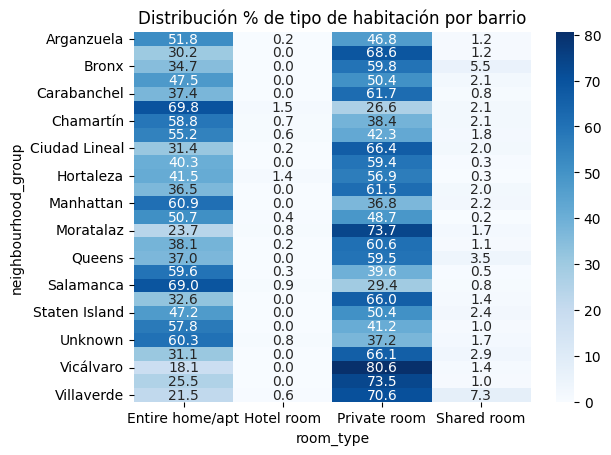

In [46]:
sns.heatmap(pd.crosstab(df['neighbourhood_group'], df['room_type'], normalize='index') * 100, annot=True, fmt=".1f", cmap="Blues")
plt.title("Distribución % de tipo de habitación por barrio")
plt.show()

#### 🏘️ Observaciones clave

#### Barrios con mayor presencia de **propiedades completas** (`Entire home/apt`)
- `Chamartín`: 69.8%
- `Salamanca`: 69.0%
- `Manhattan`: 60.9%
- → Zonas con perfil turístico o de alto poder adquisitivo.

#### Barrios con predominancia de **habitaciones privadas**
- `Vicálvaro`: 80.6%
- `Villaverde`: 70.6%
- `Ciudad Lineal`: 66.4%
- `Moratalaz`: 73.7%
- → Indican zonas residenciales donde se comparten viviendas.

#### Zonas con oferta **balanceada**
- `Queens`: 59.6% propiedades completas, 39.6% habitaciones privadas
- `Unknown`: Distribución cercana al 57/37%

---

### 📌 Conclusiones

- Existen **patrones muy distintos de alojamiento por barrio**.
- Las zonas más céntricas o exclusivas tienden a ofrecer **propiedades completas**.
- Los barrios periféricos o residenciales presentan más **habitaciones privadas**, posiblemente asociadas al alquiler compartido.
- Esta información puede guiar decisiones estratégicas sobre:
  - Oferta adecuada por ubicación
  - Segmentación de usuarios
  - Ajustes de precios según contexto barrial

---

> Este análisis aporta una comprensión más granular de la estructura del mercado de alojamiento en plataformas como Airbnb.

### Relaciones con variables numéricas

#### ¿Cómo varía el precio según el tipo de habitación?

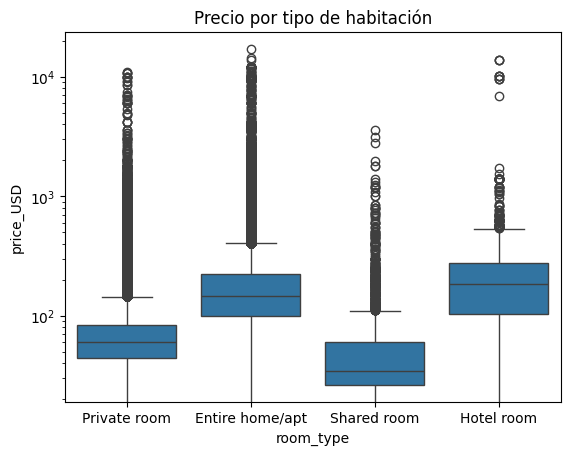

In [47]:
sns.boxplot(data=df, x='room_type', y='price_USD')
plt.yscale('log')
plt.title("Precio por tipo de habitación")
plt.show()

#### Observaciones Clave

| Tipo de habitación   | Mediana de precio | Rango de precios   | Observaciones                      |
|----------------------|-------------------|---------------------|-------------------------------------|
| `Private room`       | Bajo               | Moderado            | Oferta económica y abundante.      |
| `Shared room`        | Muy bajo           | Estrecho             | Poco frecuente, pero muy barato.   |
| `Entire home/apt`    | Alto               | Muy amplio           | Muchos outliers; precios elevados. |
| `Hotel room`         | Alto               | Amplio               | Precios similares a viviendas completas. |

---

### Conclusiones

- Las **habitaciones privadas y compartidas** son las más accesibles en términos de precio.
- Los **alojamientos completos** y **habitaciones de hotel** tienden a ser más costosos y muestran mayor variabilidad.
- La gran cantidad de **outliers** indica que existen propiedades con precios extremadamente altos en todas las categorías.
- El uso de escala logarítmica fue crucial para visualizar adecuadamente la dispersión y diferencias.

---

> Este análisis ayuda a comprender las dinámicas de precios por categoría de alojamiento y es útil para estrategias de pricing, segmentación y modelado predictivo.

¿Cómo varía el precio según la ciudad?

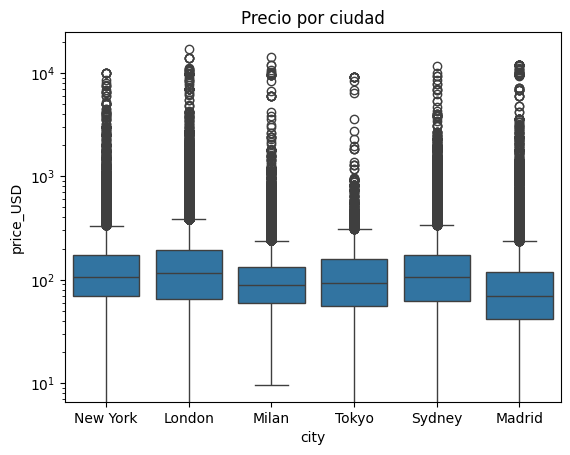

In [49]:
sns.boxplot(data=df, x='city', y='price_USD')
plt.yscale('log')
plt.title("Precio por ciudad")
plt.show()

#### Observaciones Clave

| Ciudad     | Precio típico (mediana) | Rango de precios | Observaciones |
|------------|--------------------------|------------------|----------------|
| **New York** | Alto                    | Amplio            | Alta dispersión, muchos precios extremos |
| **London**    | Alto                    | Muy amplio        | Destaca por los precios más altos del gráfico |
| **Milán, Tokio, Sydney, Madrid** | Más bajos         | Menos extremos   | Mercado más equilibrado en precios |

---

### Conclusión

- El **precio del alojamiento depende fuertemente de la ciudad**.
- Londres y Nueva York lideran en precios elevados y dispersión.
- Las otras ciudades tienen mercados más estables, pero aún muestran valores extremos.
- Esta información respalda el uso de la ciudad como una variable explicativa clave en modelos predictivos y análisis de mercado.

---

> El análisis permite identificar diferencias regionales en la estructura de precios, útil para benchmarking y estrategia de precios por ubicación.

## Evaluar normalidad del precio por ciudad

In [55]:
from scipy.stats import shapiro

cities = df['city'].unique()

for city in cities:
    price_USDs = df[df['city'] == city]['price_USD']
    if len(price_USDs) > 5000:
        price_USDs = price_USDs.sample(5000, random_state=1)
    stat, p = shapiro(price_USDs)
    print(f'{city}: p = {p}')


New York: p = 2.8661636146008152e-89
London: p = 3.1632935447615275e-84
Milan: p = 1.2219021382853653e-91
Tokyo: p = 9.456016580903685e-92
Sydney: p = 4.731083264059165e-83
Madrid: p = 5.418701371319063e-92


**Normalidad de los datos**  
   Se aplicó la prueba de Shapiro-Wilk para evaluar la distribución del precio en cada ciudad.  
   Resultado:  
   - Los datos **no siguen una distribución normal** en ninguna ciudad (p < 0.05 en todos los casos).

## Homogeneidad de varianzas

In [56]:
from scipy.stats import levene

grouped_city_price_USDs = [df[df['city'] == c]['price_USD'] for c in cities]
stat, p = levene(*grouped_city_price_USDs)
print(f'Levene test p = {p}')

Levene test p = 8.225875845677346e-53


**Homogeneidad de varianzas**  
   Se utilizó la prueba de Levene.  
   Resultado:  
   - Las varianzas entre las ciudades **no son homogéneas** (p = 0.000).

## Agrupaciones con estadísticas

### Media de precio por ciudad y tipo de habitación

In [50]:
df.groupby(['city', 'room_type'])['price_USD'].mean().unstack().round(2)

room_type,Entire home/apt,Hotel room,Private room,Shared room
city,,,,
London,235.06,321.80,79.16,73.81
Madrid,193.36,411.98,95.99,99.93
Milan,144.87,552.78,113.45,68.42
New York,211.79,NaN,89.78,70.13
Sydney,215.29,NaN,70.81,43.81
Tokyo,167.11,NaN,96.42,42.70


#### Observaciones

- Las **habitaciones de hotel** son, en general, la categoría más cara (cuando existen datos), especialmente en **Milán (552.78)** y **Madrid (411.98)**.
- **Shared rooms** son la opción más económica en todas las ciudades.
- **New York**, **Sídney**, y **Tokio** no tienen datos para `Hotel room`, posiblemente porque esta categoría está poco ofertada o mal registrada.

---

### Conclusión

La tabla evidencia diferencias claras en precios según ciudad y tipo de habitación. Esto respalda la necesidad de **segmentar la estrategia de precios por categoría y ubicación**, considerando tanto la oferta como la demanda local.

> Esta información es útil para análisis de rentabilidad, diseño de pricing dinámico o estudios de mercado.

##  Top categorías por frecuencia

In [51]:
#  Barrios más comunes
df['neighbourhood'].value_counts().head(10)

,count
neighbourhood,
Westminster,9588
Sydney,9241
Tower Hamlets,8246
Hackney,6276
Kensington and Chelsea,6018
Camden,6001
Waverley,5467
Islington,5108
Southwark,4893


#### Observaciones

- **Londres** domina el top con 8 barrios en la lista, lo que indica una gran concentración de oferta en esa ciudad.
- Algunos barrios como **Westminster**, **Kensington and Chelsea**, y **Camden** son zonas céntricas y turísticas, lo que justifica su alta densidad.
- La aparición de **Sydney** y **Waverley** sugiere que en algunos casos el nombre de la ciudad fue incluido como barrio, lo cual podría requerir revisión de consistencia en los datos.

---

#### Conclusión

Este análisis ayuda a identificar los focos de mayor actividad dentro de las ciudades, útil para:
- Análisis geoespacial
- Priorización de campañas de marketing
- Evaluación de saturación u oportunidades de expansión

> La distribución geográfica de la oferta no es uniforme y debe ser considerada en decisiones comerciales o de optimización de plataforma.

## Prueba de normalidad y homogeneidad de varianzas

In [52]:
# Prueba de normalidad para 'price_USD' por barrio (solo para los barrios principales, por ejemplo top 5)
top_neigh = df['neighbourhood'].value_counts().index[:10]
for neigh in top_neigh:
    stat, p = stats.shapiro(df[df['neighbourhood'] == neigh]['price_USD'])
    print(f'{neigh}: p = {p}')


Westminster: p = 1.7235658965930312e-106
Sydney: p = 1.808225475756497e-107
Tower Hamlets: p = 2.234503855087354e-94
Hackney: p = 3.321037846634114e-97
Kensington and Chelsea: p = 5.514756041802973e-85
Camden: p = 5.163504621074176e-94
Waverley: p = 6.381486075623753e-86
Islington: p = 1.0387833498885704e-74
Southwark: p = 2.3656285851174854e-84
Lambeth: p = 6.483389088395485e-73


> **Conclusión:**  
> En todos los barrios principales, la prueba Shapiro–Wilk arroja p-values extremadamente bajos (p ≪ 0.05), por lo que rechazamos la hipótesis de normalidad de los precios.

---

#### Implicaciones  
- **Tests Paramétricos** (e.g. t-test, ANOVA) no son adecuados sin transformar los datos.  
- Se recomienda:
  - **Transformar** `price_USD` (p.ej. logaritmo) y volver a probar normalidad.  
  - O emplear **tests no paramétricos** para comparaciones y correlaciones (Mann–Whitney, Kruskal–Wallis, Spearman, Kendall).

In [63]:
# Agrupar precios por barrio
grouped_price_USDs = [df[df['neighbourhood'] == n]['price_USD'] for n in top_neigh]

# Prueba de Levene para homogeneidad de varianzas
stat, p = levene(*grouped_price_USDs)
print(f'Levene test p = {p}')


Levene test p = 1.9993866597449804e-262


**Objetivo**  
Comprobar si la varianza de los precios (`price_USD`) es igual en los principales barrios.

---

### Resultado  
- **p-value:** 1.99 × 10⁻²⁶²  
- **Decisión:** p ≪ 0.05 → **Rechazamos la hipótesis nula** de varianzas iguales.

---

### Interpretación  
- La varianza de `price_USD` **no** es homogénea entre los barrios analizados.  
- El supuesto de homocedasticidad necesario para el ANOVA clásico **queda invalidado**.

---

### Implicaciones y Alternativas  
1. **Transformar los datos** (por ejemplo, aplicar `log1p(price_USD)`) y repetir Levene.  
2. Si persiste la heterocedasticidad:
   - Realizar **Welch’s ANOVA**, robusto a varianzas desiguales.  
   - O usar un **test no paramétrico** (p. ej. Kruskal–Wallis) para comparar medianas.

In [73]:
from scipy.stats import kruskal

# 1. Definimos la lista de series de precios por barrio
top_neigh = df['neighbourhood'].value_counts().index[:10]
grouped_price_USDs = [
    df[df['neighbourhood']==neigh]['price_USD'].dropna()
    for neigh in top_neigh
]

# 2. Aplicamos Kruskal–Wallis
stat, p = kruskal(*grouped_price_USDs)

print(f"Kruskal–Wallis H = {stat:.2f}, p = {p:.2e}")

Kruskal–Wallis H = 9209.91, p = 0.00e+00


Interpretación:

– p ≪ 0.05 → rechazamos la hipótesis nula de que todas las muestras (barrios) provienen de la misma distribución de medianas.

– Hay diferencias estadísticamente significativas en price_USD entre al menos dos de los barrios analizado

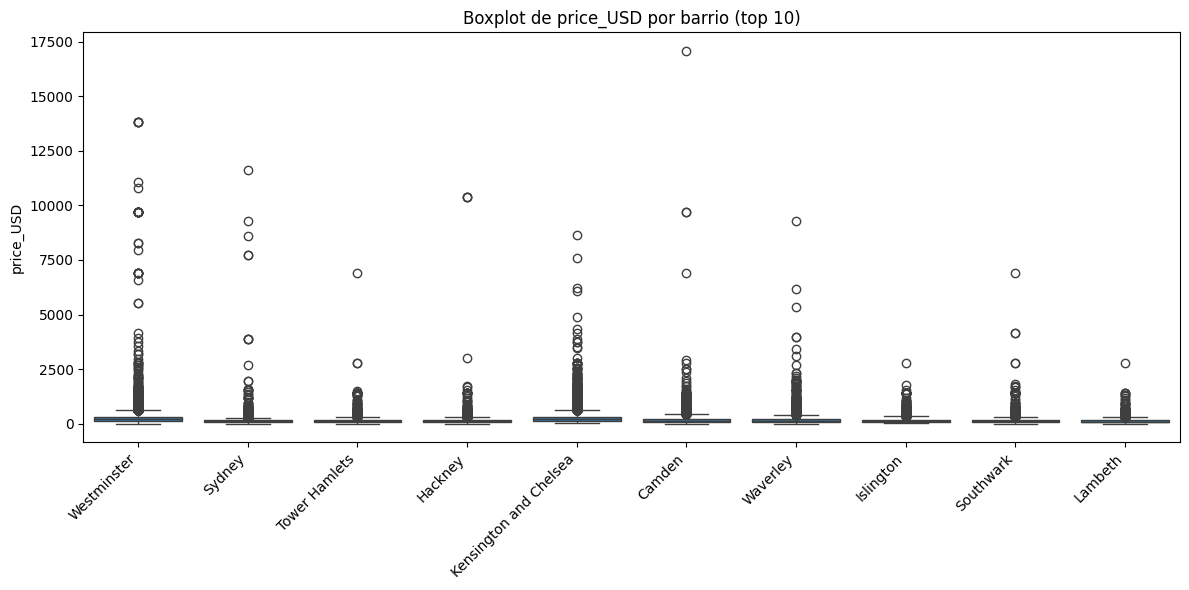

In [74]:
top_neigh = df['neighbourhood'].value_counts().index[:10]

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='neighbourhood',
    y='price_USD',
    data=df[df['neighbourhood'].isin(top_neigh)],
    order=top_neigh
)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot de price_USD por barrio (top 10)')
plt.xlabel('')
plt.ylabel('price_USD')
plt.tight_layout()
plt.show()

Tras visualizar los boxplots de `price_USD` en los diez barrios con más anuncios:

- **Variación de precios**  
  - Barrios como **Westminster**, **Kensington and Chelsea** y **Camden** presentan medianas sustancialmente más altas y rangos de precio más amplios, incluyendo múltiples valores extremos (outliers) que indican alojamientos de lujo o muy exclusivos.  
  - En contraste, barrios como **Tower Hamlets**, **Hackney**, **Lambeth**, **Waverley** e **Islington** tienen medianas más bajas y rangos más reducidos, reflejando opciones de alojamiento más económicas y homogéneas.

- **Outliers destacados**  
  - Westminster y Kensington and Chelsea concentran los precios más elevados, con varios outliers por encima de 10 000 USD, lo que sugiere una oferta de propiedades de muy alto valor.  
  - Camden y Sydney también muestran outliers notables, aunque en menor cantidad.

- **Agrupamientos informales**  
  - **Grupo Premium**: Westminster, Kensington and Chelsea, Camden y Sydney, donde el precio promedio es significativamente superior al resto.  
  - **Grupo Medio-Económico**: Tower Hamlets, Hackney, Lambeth, Waverley e Islington, con precios más moderados y menos dispersión.

**Recomendación**  
Para el diseño de tarifas, promociones o segmentación de mercado:
1. Tratar los barrios “Premium” como un segmento de alto valor, con estrategias de pricing dinámico y servicios complementarios.  
2. Dirigir ofertas de valor y paquetes más asequibles a los barrios de grupo medio, donde la competencia de precios es mayor y la variabilidad menor.

In [75]:
# Test post-hoc de Dunn con corrección de Bonferroni
!pip install scikit-posthocs --quiet

import scikit_posthocs as sp

# Prepara una lista de arrays de precios, en el mismo orden top_neigh
grouped = [
    df[df['neighbourhood']==neigh]['price_USD'].dropna().values
    for neigh in top_neigh
]

# Ejecuta Dunn
pvals = sp.posthoc_dunn(grouped, p_adjust='bonferroni')

# Ponles nombres de filas/columnas
pvals.index = top_neigh
pvals.columns = top_neigh

print("Matriz de p-values (Dunn con Bonferroni):")
print(pvals)

Matriz de p-values (Dunn con Bonferroni):
neighbourhood             Westminster         Sydney  Tower Hamlets  \
neighbourhood                                                         
Westminster              1.000000e+00   0.000000e+00   0.000000e+00   
Sydney                   0.000000e+00   1.000000e+00   3.230491e-06   
Tower Hamlets            0.000000e+00   3.230491e-06   1.000000e+00   
Hackney                  0.000000e+00   4.426934e-02   1.000000e+00   
Kensington and Chelsea   4.966395e-08   0.000000e+00   0.000000e+00   
Camden                  1.099091e-125  1.185300e-159  9.434093e-213   
Waverley                2.212392e-284   3.293614e-40   2.568494e-70   
Islington               4.393417e-275   1.892195e-37   4.264572e-66   
Southwark                0.000000e+00   2.574420e-02   1.289147e-13   
Lambeth                  0.000000e+00   1.088015e-02   1.000000e+00   

neighbourhood                 Hackney  Kensington and Chelsea         Camden  \
neighbourhood            

### Conclusión del Análisis No Paramétrico de Precios por Barrio

#### 1. Prueba de Kruskal–Wallis  
– Confirmó diferencias globales en las medianas de precio entre los 10 barrios (p ≪ 0.05).

#### 2. Test Post-hoc de Dunn (Bonferroni)  
– **La mayoría de los pares** de barrios difieren en su mediana de `price_USD` con alta significación estadística (p < 0.05).  
– **Excepciones (medianas similares)**:  
  - **Tower Hamlets, Hackney y Lambeth**  
  - **Waverley e Islington**  

#### 3. Grupos Identificados  
- **Grupo A (precios homogéneos medios-bajos):**  
  Tower Hamlets, Hackney, Lambeth  
- **Grupo B (precios homogéneos medios):**  
  Waverley, Islington  
- **Barrios con precios claramente distintos y más altos:**  
  Westminster, Kensington & Chelsea, Camden, Sydney  

#### 4. Implicaciones para la Estrategia  
1. **Segmentación de ofertas:**  
   - Diseñar tarifas y promociones específicas para el “Grupo Premium” (Westminster, Kensington & Chelsea, Camden, Sydney).  
   - Ajustar precios competitivos y paquetes de valor para el “Grupo Medio-Económico” (Tower Hamlets, Hackney, Lambeth, Waverley, Islington).  
2. **Priorización de análisis adicional:**  
   - Explorar atributos de las propiedades que expliquen las diferencias de precio entre estos grupos.

In [64]:
import scikit_posthocs as sp

# Crear matriz de comparaciones por pares
sp.posthoc_dunn(df[df['neighbourhood'].isin(top_neigh)],
                val_col='price_USD', group_col='neighbourhood', p_adjust='bonferroni')

,Camden,Hackney,Islington,Kensington and Chelsea,Lambeth,Southwark,Sydney,Tower Hamlets,Waverley,Westminster
Camden,1.000000e+00,7.104635e-169,2.130611e-29,1.058153e-160,2.140371e-154,1.733057e-88,1.185300e-159,9.434093e-213,1.350946e-29,1.099091e-125
Hackney,7.104635e-169,1.000000e+00,5.731191e-49,0.000000e+00,1.000000e+00,7.876508e-08,4.426934e-02,1.000000e+00,5.762613e-52,0.000000e+00
Islington,2.130611e-29,5.731191e-49,1.000000e+00,2.826577e-308,8.789583e-47,2.886405e-15,1.892195e-37,4.264572e-66,1.000000e+00,4.393417e-275
Kensington and Chelsea,1.058153e-160,0.000000e+00,2.826577e-308,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.966395e-08
Lambeth,2.140371e-154,1.000000e+00,8.789583e-47,0.000000e+00,1.000000e+00,2.262033e-08,1.088015e-02,1.000000e+00,2.174973e-49,0.000000e+00
Southwark,1.733057e-88,7.876508e-08,2.886405e-15,0.000000e+00,2.262033e-08,1.000000e+00,2.574420e-02,1.289147e-13,2.150653e-16,0.000000e+00
Sydney,1.185300e-159,4.426934e-02,1.892195e-37,0.000000e+00,1.088015e-02,2.574420e-02,1.000000e+00,3.230491e-06,3.293614e-40,0.000000e+00
Tower Hamlets,9.434093e-213,1.000000e+00,4.264572e-66,0.000000e+00,1.000000e+00,1.289147e-13,3.230491e-06,1.000000e+00,2.568494e-70,0.000000e+00
Waverley,1.350946e-29,5.762613e-52,1.000000e+00,0.000000e+00,2.174973e-49,2.150653e-16,3.293614e-40,2.568494e-70,1.000000e+00,2.212392e-284
Westminster,1.099091e-125,0.000000e+00,4.393417e-275,4.966395e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.212392e-284,1.000000e+00


In [65]:
from scipy.stats import kruskal

kruskal_result = kruskal(*grouped_price_USDs)
print(f'Kruskal-Wallis p = {kruskal_result.pvalue}')


Kruskal-Wallis p = 0.0


In [66]:
import scikit_posthocs as sp

# Subset con solo los barrios del top
df_top = df[df['neighbourhood'].isin(top_neigh)]

# Dunn's test
dunn_result = sp.posthoc_dunn(df_top, val_col='price_USD', group_col='neighbourhood', p_adjust='bonferroni')
dunn_result


,Camden,Hackney,Islington,Kensington and Chelsea,Lambeth,Southwark,Sydney,Tower Hamlets,Waverley,Westminster
Camden,1.000000e+00,7.104635e-169,2.130611e-29,1.058153e-160,2.140371e-154,1.733057e-88,1.185300e-159,9.434093e-213,1.350946e-29,1.099091e-125
Hackney,7.104635e-169,1.000000e+00,5.731191e-49,0.000000e+00,1.000000e+00,7.876508e-08,4.426934e-02,1.000000e+00,5.762613e-52,0.000000e+00
Islington,2.130611e-29,5.731191e-49,1.000000e+00,2.826577e-308,8.789583e-47,2.886405e-15,1.892195e-37,4.264572e-66,1.000000e+00,4.393417e-275
Kensington and Chelsea,1.058153e-160,0.000000e+00,2.826577e-308,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.966395e-08
Lambeth,2.140371e-154,1.000000e+00,8.789583e-47,0.000000e+00,1.000000e+00,2.262033e-08,1.088015e-02,1.000000e+00,2.174973e-49,0.000000e+00
Southwark,1.733057e-88,7.876508e-08,2.886405e-15,0.000000e+00,2.262033e-08,1.000000e+00,2.574420e-02,1.289147e-13,2.150653e-16,0.000000e+00
Sydney,1.185300e-159,4.426934e-02,1.892195e-37,0.000000e+00,1.088015e-02,2.574420e-02,1.000000e+00,3.230491e-06,3.293614e-40,0.000000e+00
Tower Hamlets,9.434093e-213,1.000000e+00,4.264572e-66,0.000000e+00,1.000000e+00,1.289147e-13,3.230491e-06,1.000000e+00,2.568494e-70,0.000000e+00
Waverley,1.350946e-29,5.762613e-52,1.000000e+00,0.000000e+00,2.174973e-49,2.150653e-16,3.293614e-40,2.568494e-70,1.000000e+00,2.212392e-284
Westminster,1.099091e-125,0.000000e+00,4.393417e-275,4.966395e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.212392e-284,1.000000e+00


Prácticamente todos los barrios difieren en precios entre sí, con pocas excepciones.


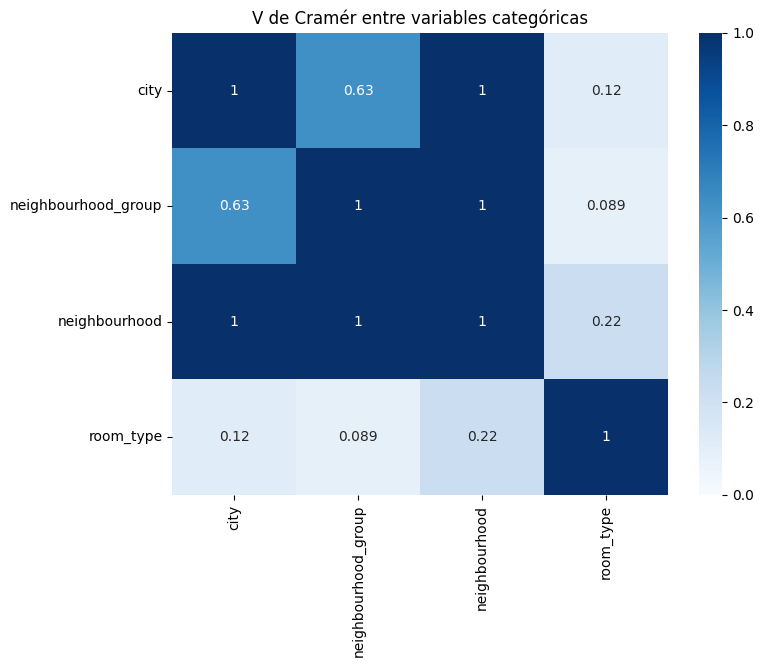

In [67]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Corrección de bias si hay muchas columnas/filas pequeñas
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_vars = ['city', 'neighbourhood_group', 'neighbourhood', 'room_type']

# Crear matriz de V de Cramér entre todas las variables categóricas
results = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 == var2:
            results.loc[var1, var2] = 1.0
        else:
            results.loc[var1, var2] = cramers_v(df[var1], df[var2])

# Convertir a float para visualización
results = results.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(results, annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('V de Cramér entre variables categóricas')
plt.show()

#### Resultados destacados

| Variables comparadas                     | V de Cramér | Interpretación                   |
|-----------------------------------------|-------------|----------------------------------|
| `city` vs `neighbourhood`               | 1.0         | Relación perfecta (esperada).   |
| `neighbourhood_group` vs `neighbourhood`| 1.0         | Relación perfecta (jerarquía).  |
| `city` vs `neighbourhood_group`         | 0.63        | Asociación fuerte.              |
| `room_type` vs `neighbourhood`          | 0.22        | Asociación débil a moderada.    |
| `room_type` vs `city`                   | 0.12        | Asociación débil.               |
| `room_type` vs `neighbourhood_group`    | 0.089       | Asociación muy débil.           |

---

#### Conclusión

- Las variables de ubicación (`neighbourhood`, `city`, `neighbourhood_group`) están fuertemente relacionadas, como es lógico.
- El tipo de habitación (`room_type`) tiene **baja dependencia con la ubicación**, lo que sugiere que **la oferta de tipos de alojamiento es diversa en todas las zonas**.
- Esta información es útil para:
  - Detectar redundancias
  - Seleccionar variables en modelos
  - Evaluar si conviene usar ambas (`city` y `neighbourhood`) en análisis posteriores

> El análisis con V de Cramér permite identificar relaciones latentes entre variables categóricas y tomar decisiones más informadas en análisis y modelado.

------
------

# Análisis variables categóricas

In [69]:
df.describe()

,id_announcement,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_USD
count,2.200310e+05,2.200310e+05,220031.000000,220031.000000,220031.000000,220031.000000,220031.000000,220031.000000,220031.000000,220031.000000
mean,2.240831e+07,8.494528e+07,32.573053,16.428135,5.258023,20.129164,0.944819,13.450046,120.403526,158.612215
std,1.175490e+07,8.856607e+07,30.144854,76.030471,20.118261,43.012277,1.430133,73.206771,131.103156,323.145651
min,2.539000e+03,1.944000e+03,-34.135212,-74.244420,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.338370e+07,1.439602e+07,40.412620,-3.705870,1.000000,1.000000,0.000000,1.000000,0.000000,61.890000
50%,2.249789e+07,4.640392e+07,40.794240,-0.128380,2.000000,4.000000,0.320000,1.000000,77.000000,102.000000
75%,3.155445e+07,1.415097e+08,51.496200,9.199535,4.000000,19.000000,1.290000,3.000000,225.000000,172.930000
max,5.095505e+07,4.117208e+08,51.681690,151.339811,1250.000000,896.000000,58.500000,999.000000,365.000000,17078.760000


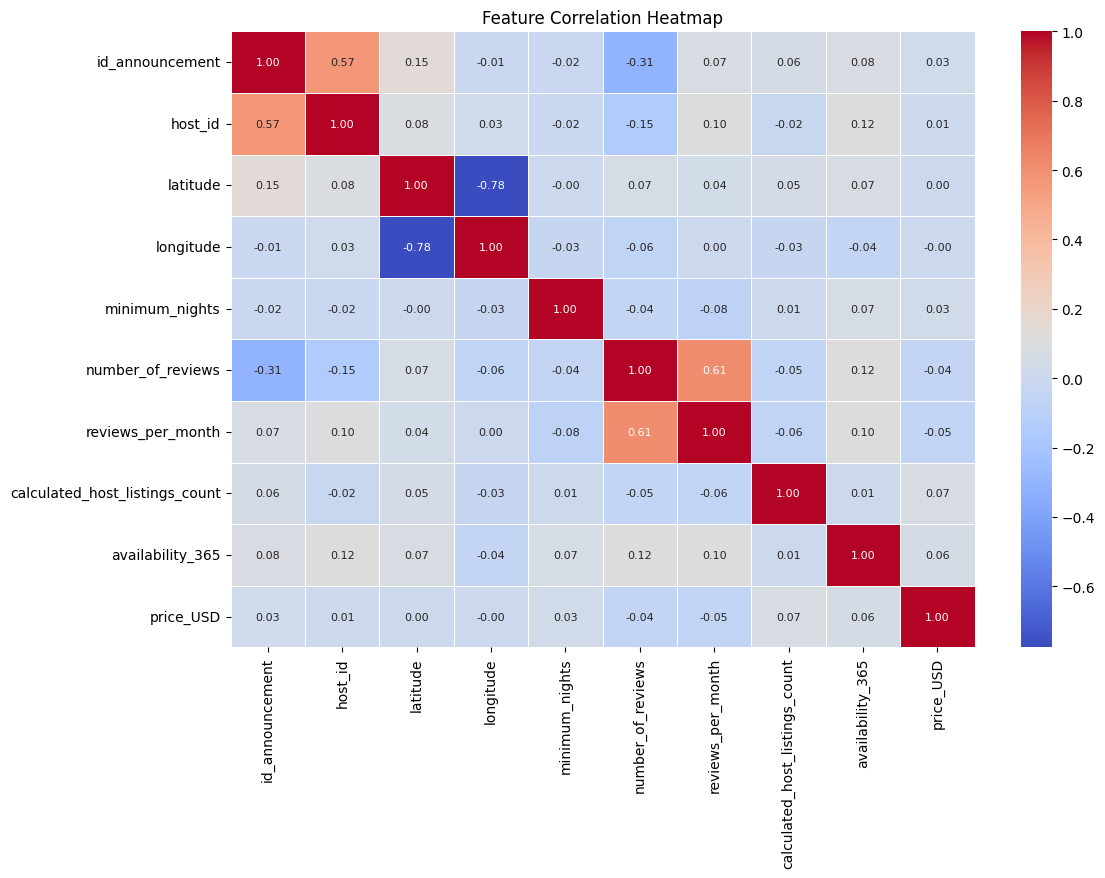

In [68]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, linewidths=0.5,
            fmt=".2f", annot_kws={"size": 8})
plt.title("Feature Correlation Heatmap")
plt.show()

#### Principales Observaciones

| Variables Comparadas                       | Correlación | Interpretación                                   |
|--------------------------------------------|-------------|--------------------------------------------------|
| `latitude` vs `longitude`                  | -0.78       | Fuerte correlación negativa, esperada por distribución geográfica |
| `number_of_reviews` vs `reviews_per_month` | 0.61        | Fuerte correlación, indica que ambas se relacionan directamente |
| `id_announcement` vs `host_id`             | 0.57        | Moderada correlación estructural del sistema     |
| `price_USD` vs otras variables             | 0.00 - 0.07 | Sin correlaciones lineales relevantes            |

---

#### Conclusión

- La mayoría de las variables numéricas no muestran correlaciones lineales fuertes.
- **`price_USD` no se correlaciona linealmente** con otras numéricas → su comportamiento probablemente depende de variables categóricas (`city`, `room_type`, etc.) o relaciones no lineales.
- Este análisis sugiere que para modelado predictivo, puede ser necesario:
  - Incluir variables categóricas
  - Aplicar transformaciones o modelos no lineales

> El mapa de calor de correlación ayuda a detectar relaciones entre variables y orientar la selección de atributos en modelos predictivos o análisis estadísticos.

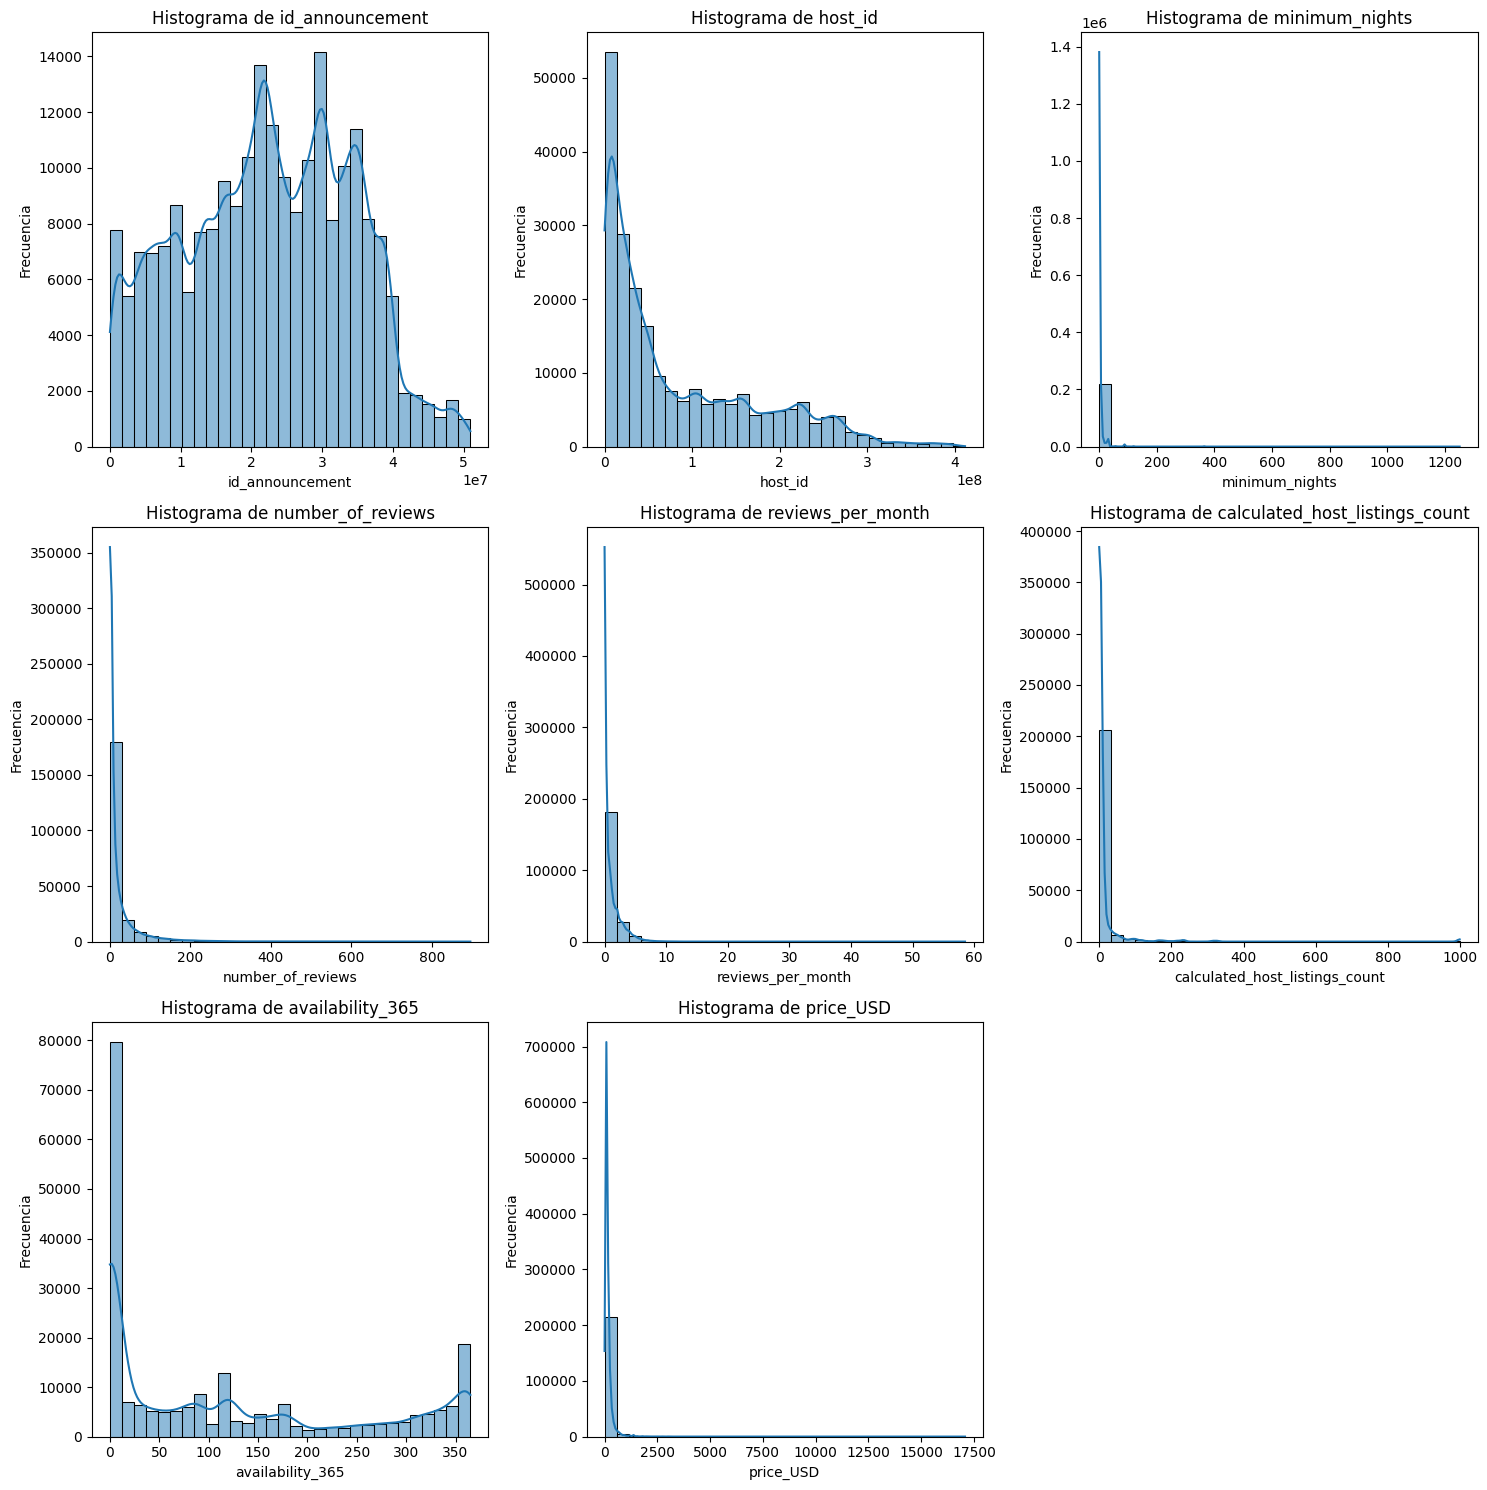

In [71]:
# Definir las columnas a graficar
columns = ['id_announcement', 'host_id', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price_USD']

# Crear los histogramas
plt.figure(figsize=(15, 15)) # Increased figure size for better readability
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i) # Changed to 3x3 grid to accommodate all plots
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Observaciones por variable

| Variable                        | Distribución          | Observaciones clave                                      |
|--------------------------------|------------------------|----------------------------------------------------------|
| `id_announcement`              | Uniforme artificial    | Es un ID secuencial, no relevante para análisis          |
| `host_id`                      | Sesgada a la izquierda | Concentración en IDs bajos, comportamiento esperado      |
| `minimum_nights`               | Muy sesgada a la derecha | Predominan alojamientos con pocas noches mínimas        |
| `number_of_reviews`            | Muy sesgada a la derecha | La mayoría tiene pocas reseñas, algunos llegan a >800   |
| `reviews_per_month`            | Sesgada a la derecha   | La mayoría tiene pocas reseñas mensuales                 |
| `calculated_host_listings_count` | Sesgada a la derecha | La mayoría de los hosts tiene 1–3 anuncios, pocos tienen cientos |
| `availability_365`            | Bimodal (0 y 365)      | Muchos alojamientos están o siempre disponibles o nunca  |
| `price_USD`                    | Muy sesgada a la derecha | Predominan precios bajos, pero existen muchos outliers   |

---

### Conclusiones

- La mayoría de las variables **no presentan distribución normal**.
- Se identificaron **outliers extremos** que deben ser considerados para limpieza o transformación.
- Variables como `price_USD` y `minimum_nights` podrían beneficiarse de **escalado logarítmico o winsorización** para mejorar estabilidad en modelos.
- El comportamiento bimodal en `availability_365` sugiere **estrategias de uso distintas entre anfitriones**.

> Esta exploración es esencial para preparar los datos antes de aplicar técnicas estadísticas o de machine learning.

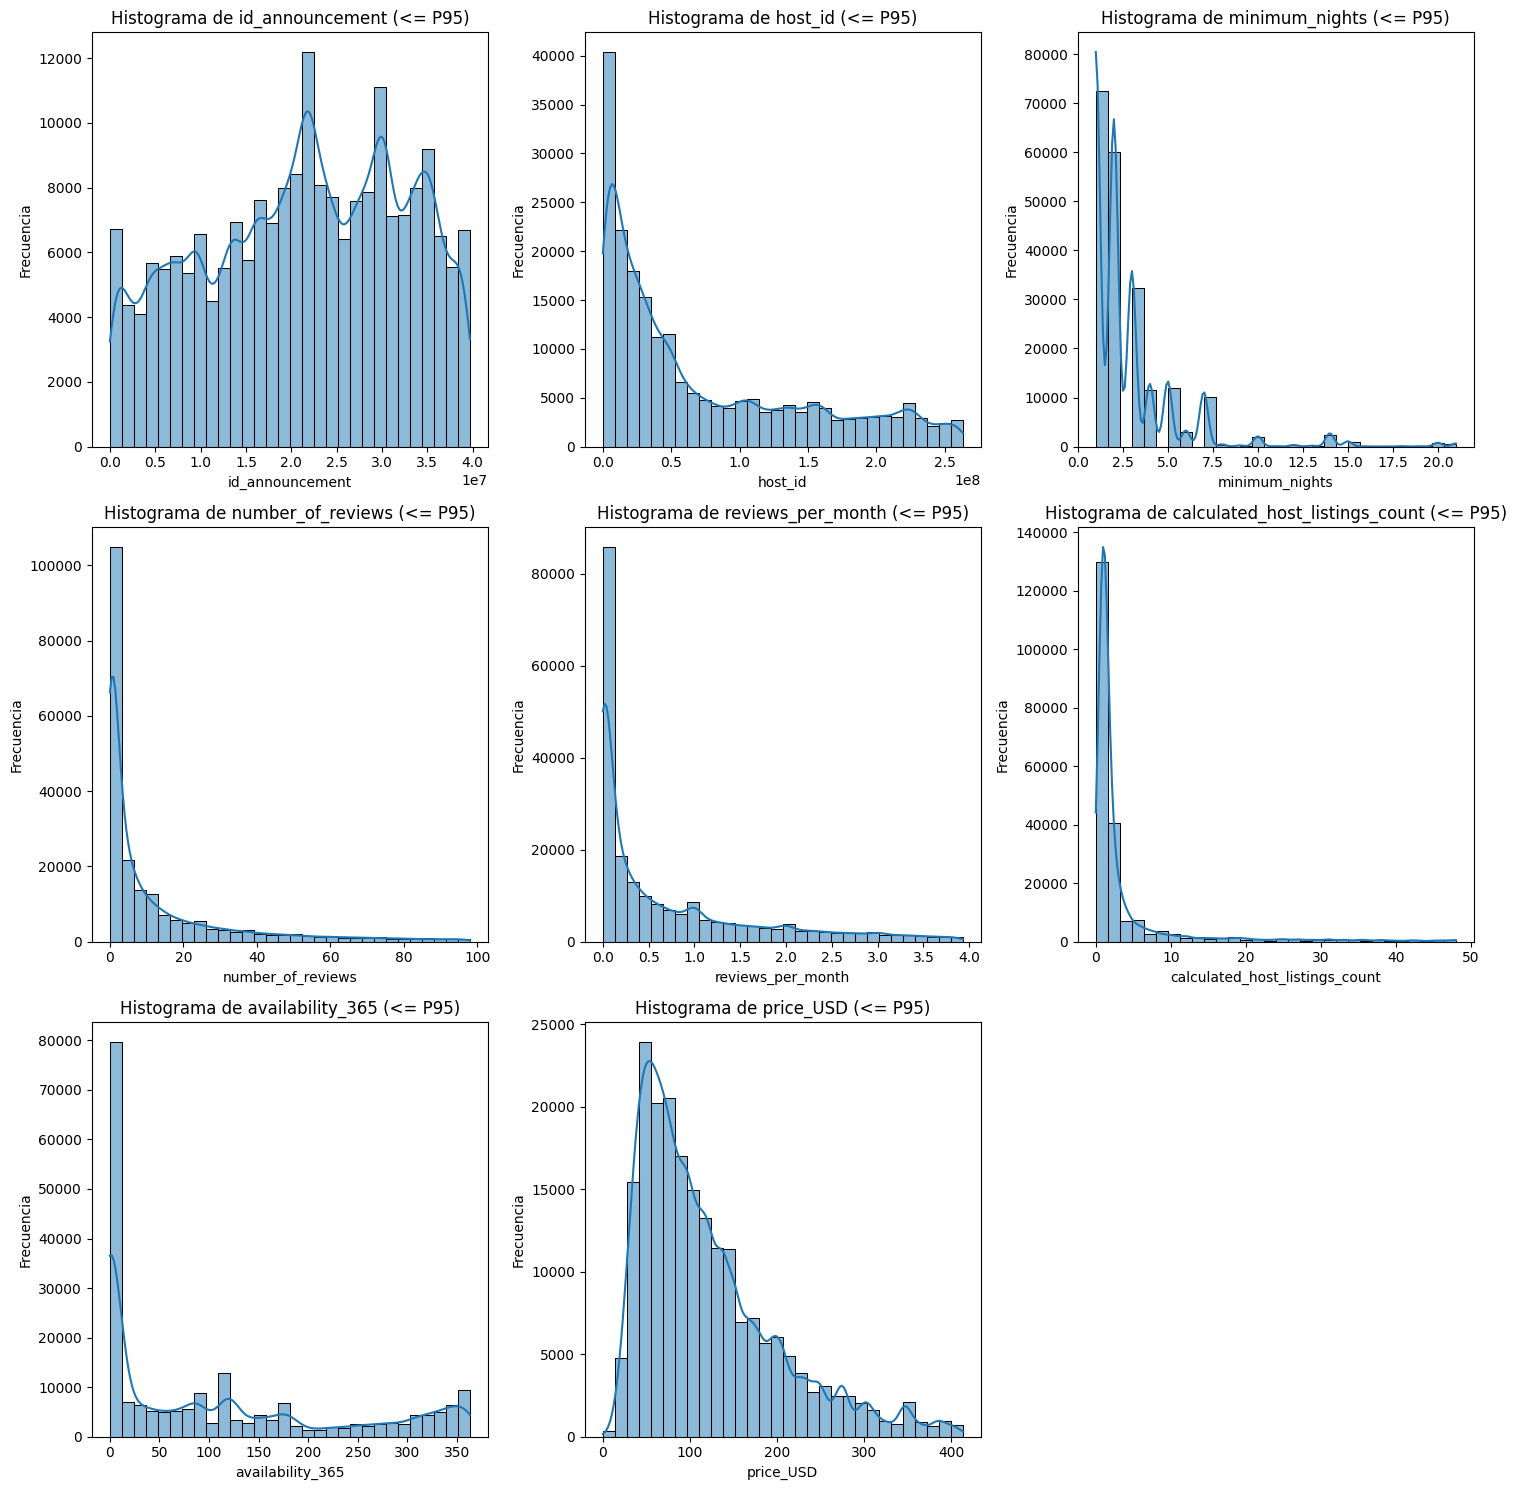

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las columnas a graficar
columns = ['id_announcement', 'host_id', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price_USD']

# Crear los histogramas con el percentil 95
plt.figure(figsize=(15, 15))
for i, col in enumerate(columns, 1):
    # Calcular el percentil 95
    p95 = df[col].quantile(0.95)
    # Filtrar los datos menores o iguales al percentil 95
    filtered_data = df[df[col] <= p95]

    plt.subplot(3, 3, i)
    sns.histplot(filtered_data[col], bins=30, kde=True)
    plt.title(f'Histograma de {col} (<= P95)')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()